<div class="alert alert-block alert-success">  
<h1><strong>🏠Housing Prices in Indian Metropolitan Areas</strong></h1>
    <p>Being born and brought up in a metropolitan city, I've witnessed the city develop and the housing prices rise depending on the availability of amenities in a particular region. This was my motivation of putting together a dataset for analysis 😄 <br><br>
        Now let's delve into the factors that govern the pricing!
    </p>
</div>

<div>
<img src="https://punreal.com/wp-content/uploads/2017/03/Hey2CHouseitGoing.png" width="550"/>
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intermediate-notebooks-data/Hyderabad_updated.csv
/kaggle/input/intermediate-notebooks-data/netflix.png
/kaggle/input/intermediate-notebooks-data/Delhi_updated.csv
/kaggle/input/intermediate-notebooks-data/lisa.jpg
/kaggle/input/intermediate-notebooks-data/homer.jpg
/kaggle/input/intermediate-notebooks-data/prime.png
/kaggle/input/intermediate-notebooks-data/homer1.jpg
/kaggle/input/intermediate-notebooks-data/disney.png
/kaggle/input/intermediate-notebooks-data/marge1.jpg
/kaggle/input/intermediate-notebooks-data/lisa1.jpg
/kaggle/input/intermediate-notebooks-data/marge.png
/kaggle/input/intermediate-notebooks-data/hulu.png
/kaggle/input/intermediate-notebooks-data/Mumbai_updated.csv
/kaggle/input/intermediate-notebooks-data/bart.png
/kaggle/input/intermediate-notebooks-data/bart1.jpg
/kaggle/input/intermediate-notebooks-data/Chennai_updated.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of-india/Hyderabad.csv
/kaggle/input/housing-prices-in-metropolitan-areas-of

<div class="alert alert-info">  
<h3><strong>Imports</strong></h3>
</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math

from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [3]:
!pip install geopy 
!pip install Nominatim
!pip install folium

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
  Created wheel for Nominatim: filename=nominatim-0.1-py3-none-any.whl size=2363 sha256=c8cb3f332a210b86b3376e40d214610e4399af79b4b4a7f6a0a5cd7c9c7a4997
  Stored in directory: /root/.cache/pip/wheels/37/00/9e/d904c390bfb174830ad3dcfd62af5544cee7d88bed4f8acedd
Successfully built Nominatim
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


<div class="alert alert-info">  
<h3><strong>Custom Color Palette</strong></h3>
</div>

In [4]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

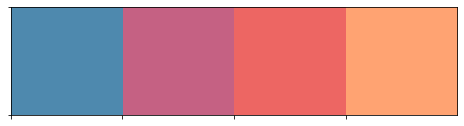

In [5]:
sns.palplot(sns.color_palette(custom_colors),size=2)

<div class="alert alert-light">  
<h4><strong>Mumbai</strong></h4>
</div>

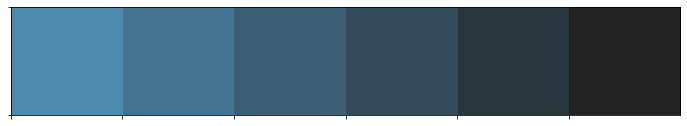

In [6]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=2)

<div class="alert alert-light">  
<h4><strong>Delhi</strong></h4>
</div>

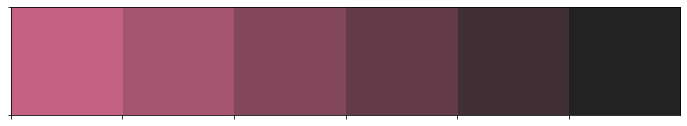

In [7]:
delhi = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(delhi),size=2)

<div class="alert alert-light">  
<h4><strong>Chennai</strong></h4>
</div>

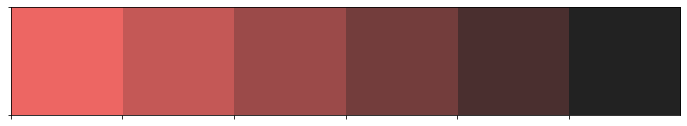

In [8]:
chennai = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(chennai),size=2)

<div class="alert alert-light">  
<h4><strong>Hyderabad</strong></h4>
</div>

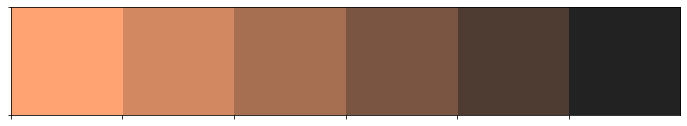

In [9]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad),size=2)

<div class="alert alert-info">  
<h3><strong>Loading the dataset and displaying rows</strong></h3>
</div>

In [10]:
df1 = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Mumbai.csv')
df2 = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Delhi.csv')
df3 = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Chennai.csv')
df4 = pd.read_csv('../input/housing-prices-in-metropolitan-areas-of-india/Hyderabad.csv')

In [11]:
df1.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [12]:
df2.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
df3.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [14]:
df4.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


<div class="alert alert-warning">
<p>Since for a set of houses, nothing was mentioned about certain amenities, '9' was used to mark such values, which could indicate the absense of information about the apartment but these values dont't ascertain the absence of such a feature in real life.<br><br>
We will be dropping these values so that they don't cloud our analysis.
</p>
</div>

In [15]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)

In [16]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

<div class="alert alert-info">  
<h3><strong>Dataframe shape after dropping values</strong></h3>
</div>

In [17]:
print(f"{y_}Mumbai:{r_}{df1.shape}\n")
print(f"{y_}Delhi:{r_}{df2.shape}\n")
print(f"{y_}Chennai:{r_}{df3.shape}\n")
print(f"{y_}Hyderabad:{r_}{df4.shape}\n")

Mumbai:(1398, 40)

Delhi:(2002, 40)

Chennai:(2233, 40)

Hyderabad:(2434, 40)



In [18]:
print(f"{y_}Data types of data columns: \n{m_}{df1.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

<div class="alert alert-warning">
<p>Modifying price to price in lakhs(INR)
</p>
</div>

In [19]:
df1['Price'] = df1['Price']/100000
df2['Price'] = df1['Price']/100000
df3['Price'] = df1['Price']/100000
df4['Price'] = df1['Price']/100000

<div class="alert alert-info">
    <h3><p>Feature generation: latitude and longitude</p></h3>
</div>

In [20]:
geolocator = Nominatim(user_agent="Ruch")

def feature_generation(df):
    lat=[]
    long=[]
    a=0
    for i in df['Location']: 
        location = geolocator.geocode(i)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
            print(a)
        except:
            lat.append("NA")
            long.append("NA")
        a=a+1
    df['Latitude'] = lat
    df['Longitude'] = long

In [21]:
# feature_generation(df1)
# feature_generation(df2)
# feature_generation(df3)
# feature_generation(df4)

In [22]:
# df1.to_csv('/kaggle/working/Mumbai_updated.csv')
# df2.to_csv('/kaggle/working/Delhi_updated.csv')
# df3.to_csv('/kaggle/working/Chennai_updated.csv')
# df4.to_csv('/kaggle/working/Hyderabad_updated.csv')

In [23]:
df1 = pd.read_csv('../input/intermediate-notebooks-data/Mumbai_updated.csv')
df2 = pd.read_csv('../input/intermediate-notebooks-data/Delhi_updated.csv')
df3 = pd.read_csv('../input/intermediate-notebooks-data/Chennai_updated.csv')
df4 = pd.read_csv('../input/intermediate-notebooks-data/Hyderabad_updated.csv')

In [24]:
df1.head(5)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
0,0,48.5,720,Kharghar,1,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.025773,73.059185
1,1,45.0,600,Kharghar,1,1,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.025773,73.059185
2,2,67.0,650,Kharghar,1,1,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.025773,73.059185
3,3,45.0,650,Kharghar,1,1,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.025773,73.059185
4,4,50.0,665,Kharghar,1,1,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.025773,73.059185


<div class="alert alert-info">  
<h3><strong>EDA</strong></h3>
</div>

In [25]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(15,8),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

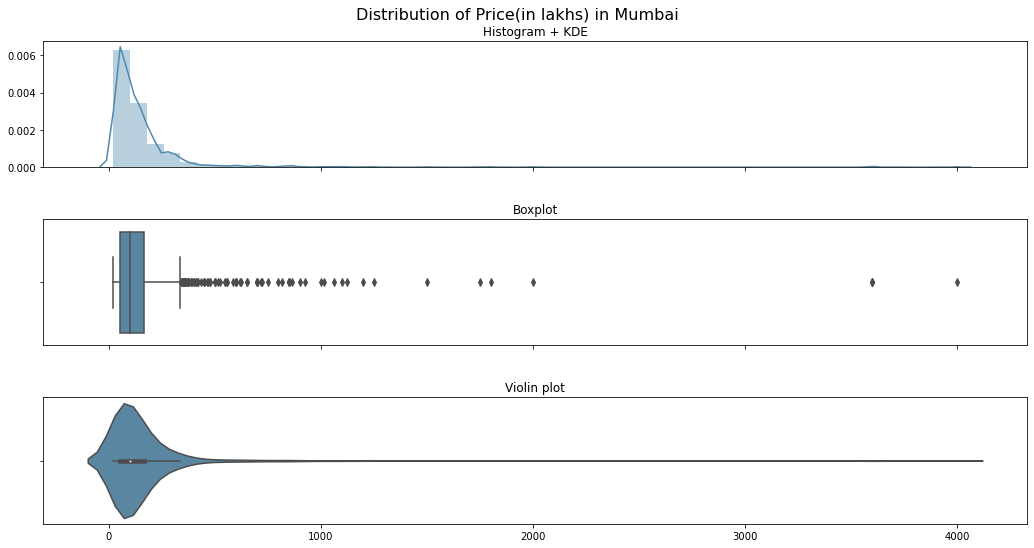

In [26]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

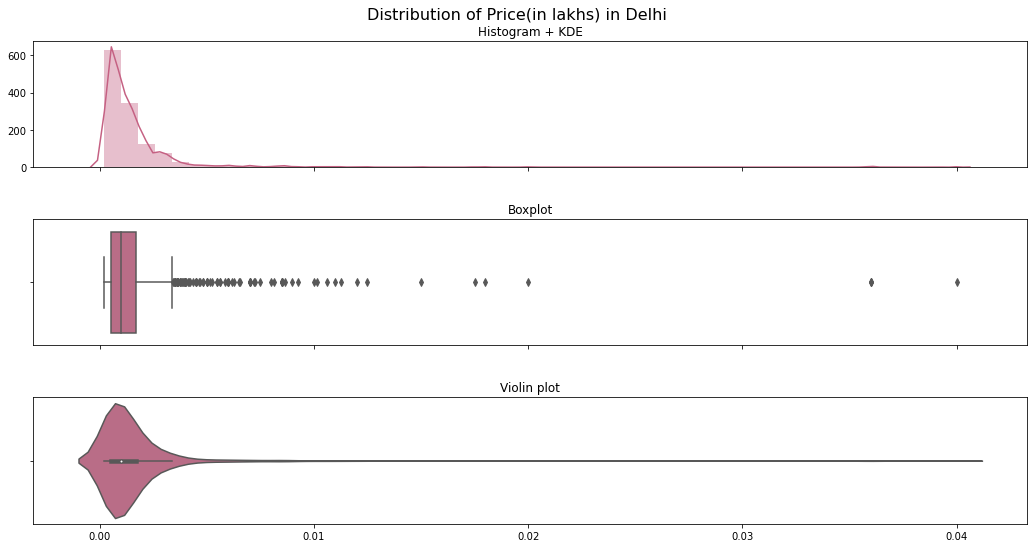

In [27]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[1])

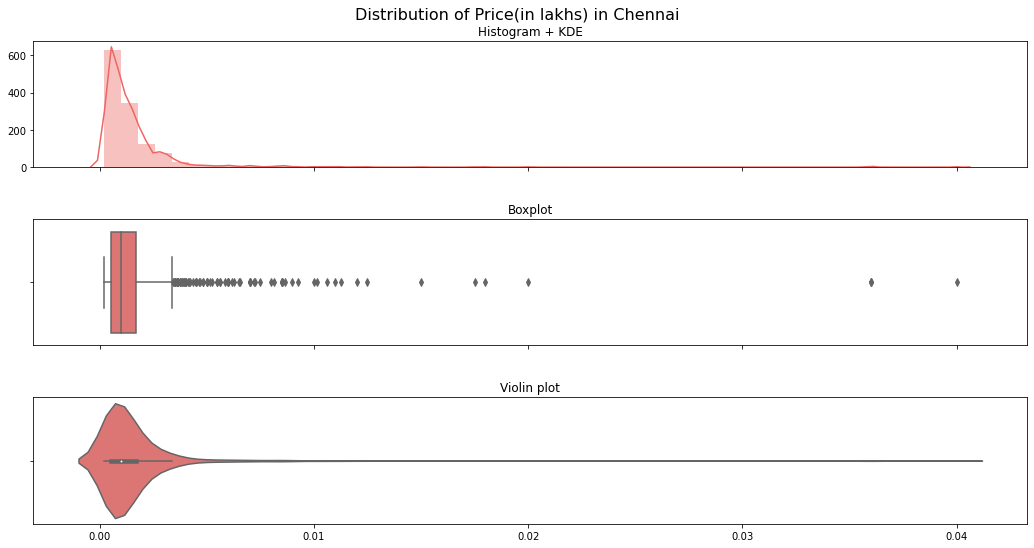

In [28]:
triple_plot(df3['Price'],'Distribution of Price(in lakhs) in Chennai',custom_colors[2])

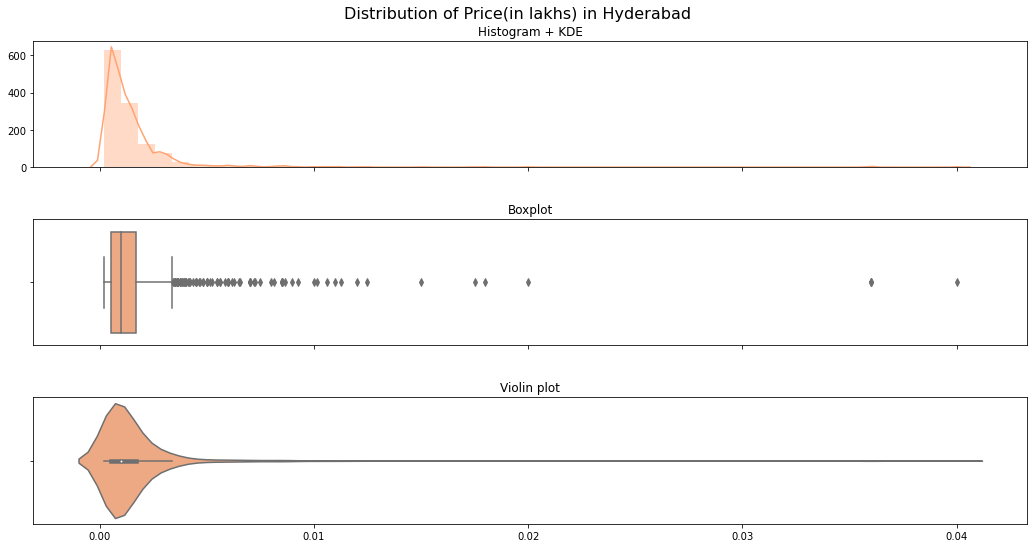

In [29]:
triple_plot(df4['Price'],'Distribution of Price(in lakhs) in Hyderabad',custom_colors[3])

In [30]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

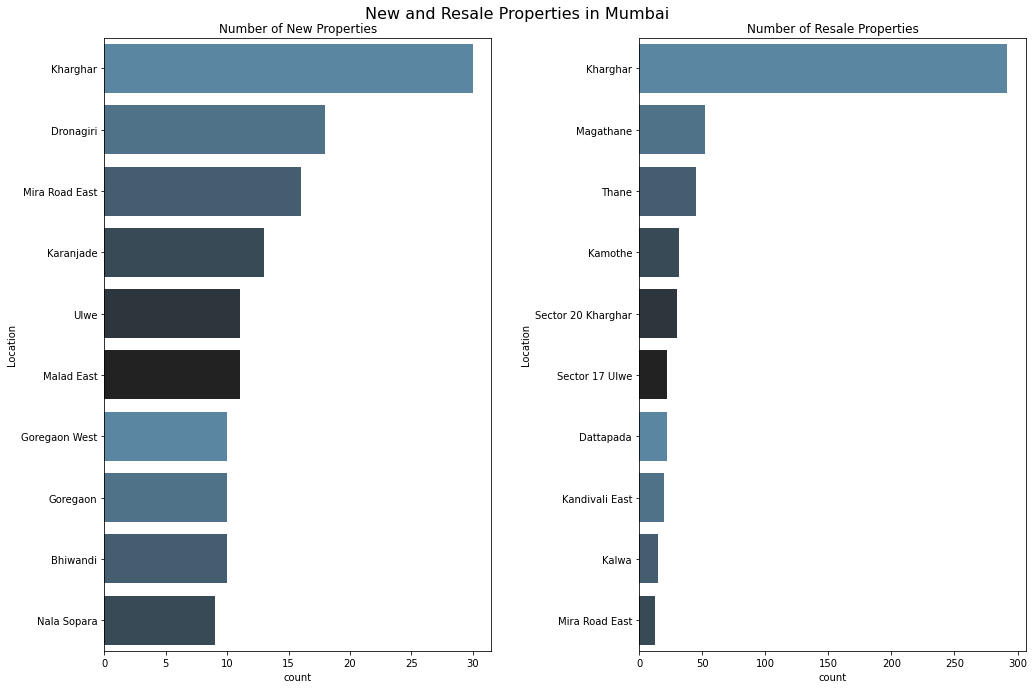

In [31]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

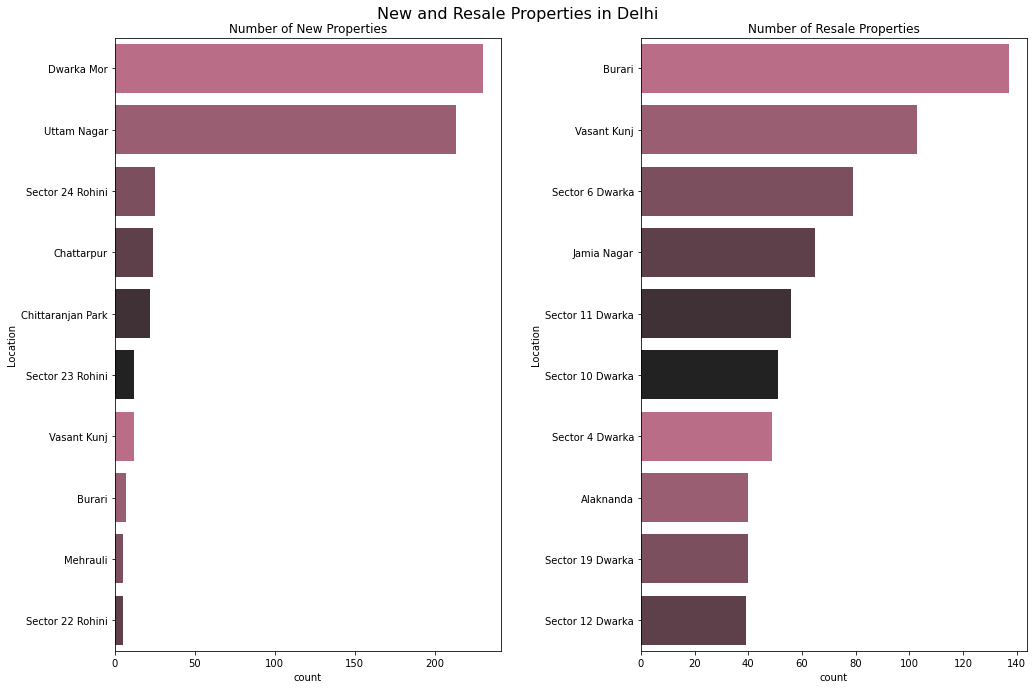

In [32]:
count_plot(df2,'New and Resale Properties in Delhi',delhi)

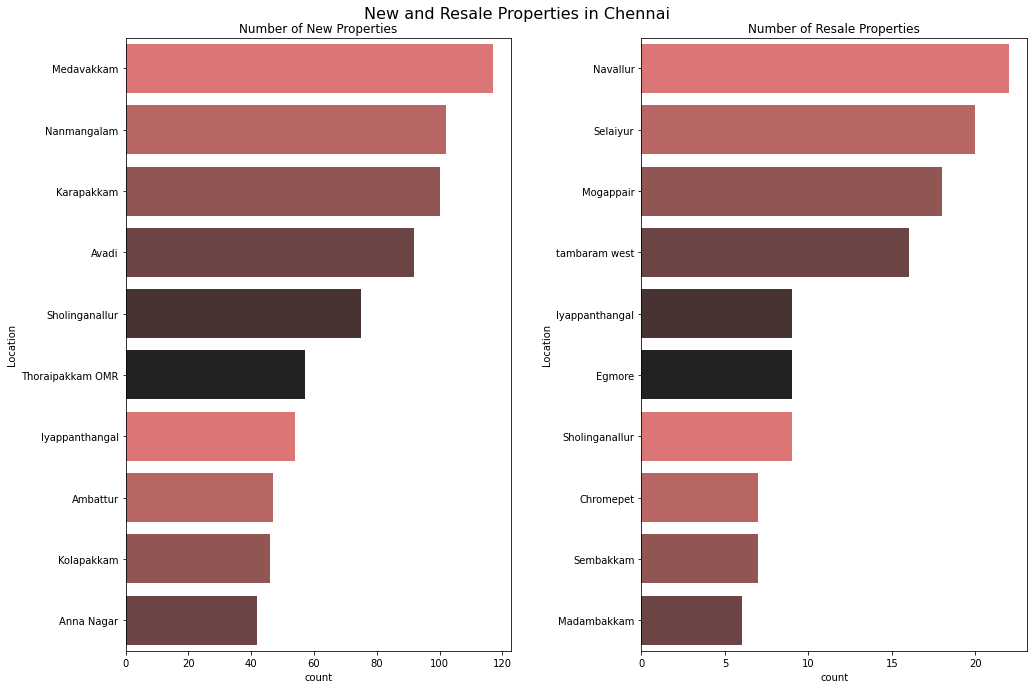

In [33]:
count_plot(df3,'New and Resale Properties in Chennai',chennai)

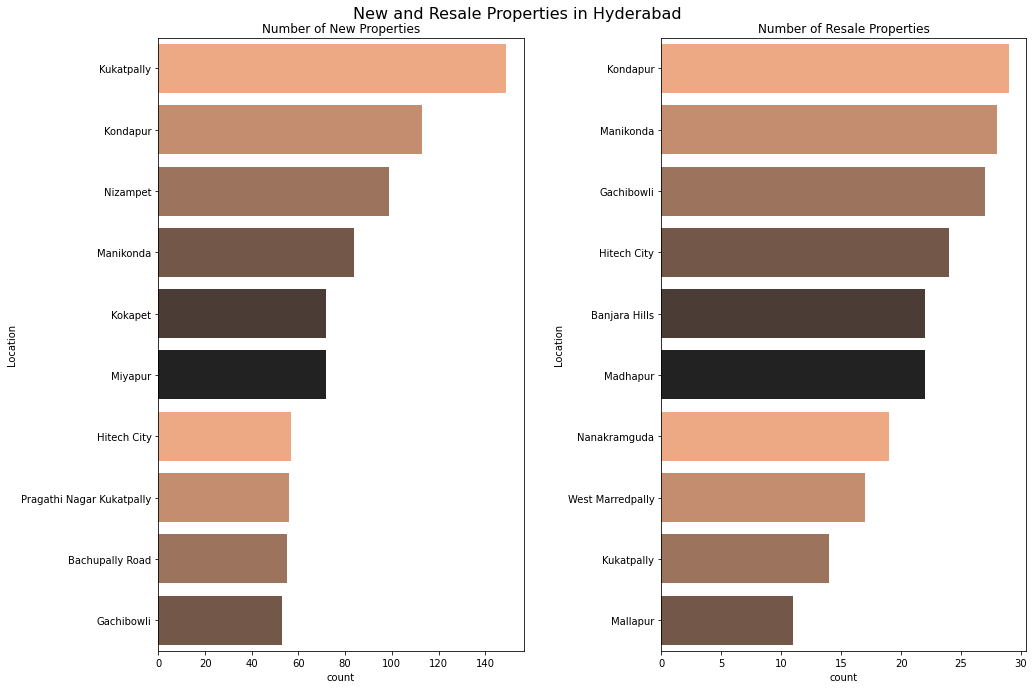

In [34]:
count_plot(df4,'New and Resale Properties in Hyderabad',hyderabad)

In [35]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.show()

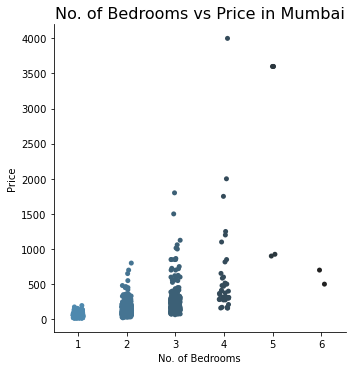

In [36]:
cat_plot(df1,'Mumbai',mumbai)

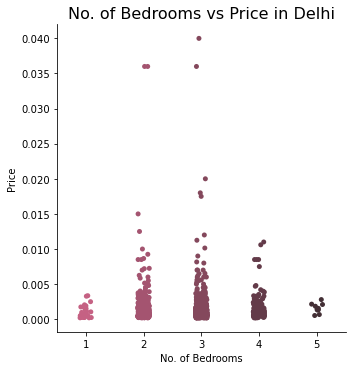

In [37]:
cat_plot(df2,'Delhi',delhi)

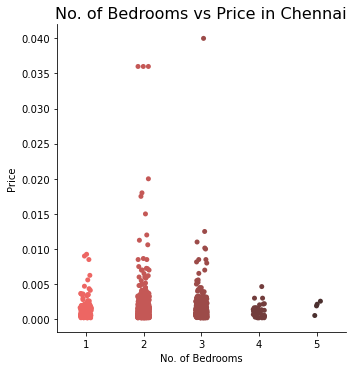

In [38]:
cat_plot(df3,'Chennai',chennai)

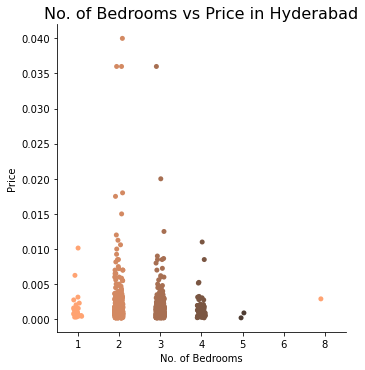

In [39]:
cat_plot(df4,'Hyderabad',hyderabad)

In [40]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c)
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.show()

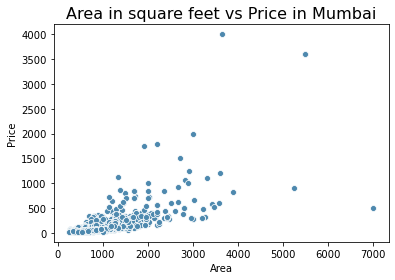

In [41]:
scatter_plot(df1,'Mumbai',custom_colors[0])

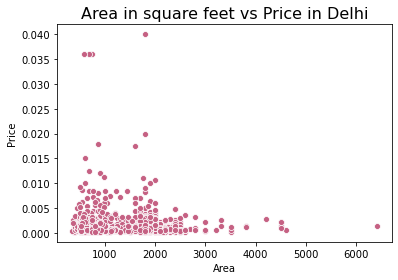

In [42]:
scatter_plot(df2,'Delhi',custom_colors[1])

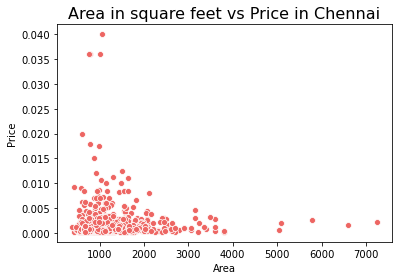

In [43]:
scatter_plot(df3,'Chennai',custom_colors[2])

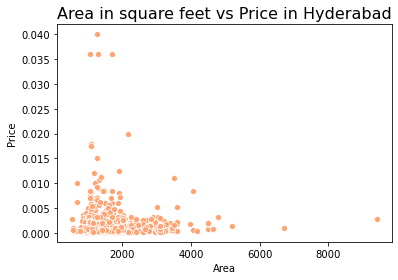

In [44]:
scatter_plot(df4,'Hyderabad',custom_colors[3])

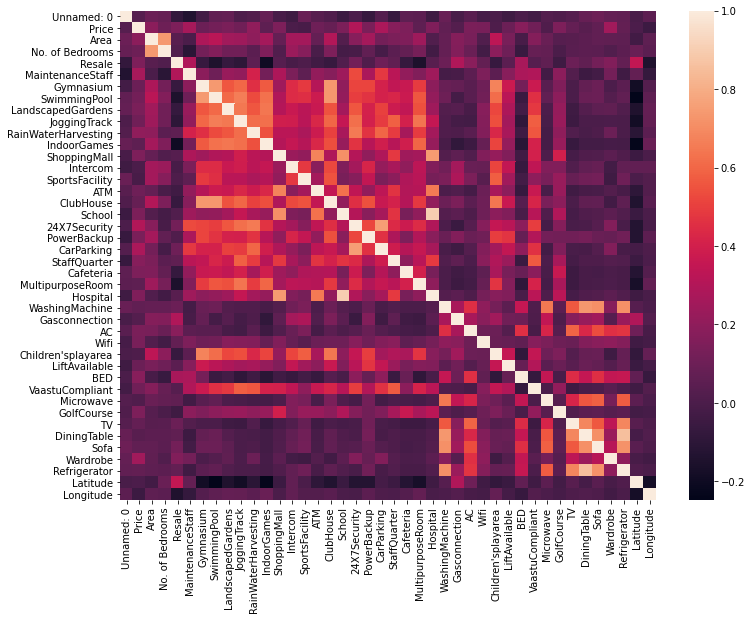

In [45]:
frames = [df1,df2,df3,df4]
merged = pd.concat(frames)
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(merged.corr(), ax=ax);

In [46]:
def preprocess(df) :
    df = df[['Latitude','Longitude','Price']]
    df = df.replace('NA', np.nan)
    df.dropna(subset=['Latitude'], inplace=True)
    df.dropna(subset=['Price'], inplace=True)
    df["Latitude"] = df["Latitude"].astype(float)
    df["Longitude"] = df["Longitude"].astype(float)
    return df

In [47]:
map1_df = preprocess(df1)
map2_df = preprocess(df2)
map3_df = preprocess(df3)
map4_df = preprocess(df4)

<div class="alert alert-info">  
<h3><strong>House locations in Mumbai</strong></h3>
</div>

In [48]:
city_map = folium.Map(location=[19.08,72.74], zoom_start=11.2, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map1_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
    city_map.add_child(mc)
city_map

<div class="alert alert-info">  
<h3><strong>House locations in Delhi</strong></h3>
</div>

In [49]:
city_map = folium.Map(location=[28.69,76.95], zoom_start=10, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map2_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
    city_map.add_child(mc)
city_map

<div class="alert alert-info">  
<h3><strong>House locations in Chennai</strong></h3>
</div>

In [50]:
city_map = folium.Map(location=[13.04,80], zoom_start=10.5, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map3_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
    city_map.add_child(mc)
city_map

<div class="alert alert-info">  
<h3><strong>House locations in Hyderabad</strong></h3>
</div>

In [51]:
city_map = folium.Map(location=[17.4,78.2], zoom_start=10, tiles='Stamen Terrain')
mc = MarkerCluster()
for idx, row in map4_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
    city_map.add_child(mc)
city_map